In [56]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

from scipy.ndimage.morphology import binary_opening as bo
from scipy.ndimage.morphology import binary_erosion as be
from scipy.ndimage.morphology import binary_closing as bc
from scipy.ndimage.morphology import binary_fill_holes as bfh

from ipywidgets import interact, fixed
from IPython.display import display

import os
os.chdir('/Volumes/FAIR/DC-Image-Analysis/DC-project-master/cleancode/NewMidplane')

%matplotlib inline
# Calculate parameters low and high from window and level

def wl_to_lh(window, level):
    low = level - window/2
    high = level + window/2
    return low,high

def display_image(img, x=None, y=None, z=None, window=None, level=None):
    # Convert SimpleITK image to NumPy array
    img_array = sitk.GetArrayFromImage(img)
    
    # Get image dimensions in millimetres
    size = img.GetSize()
    spacing = img.GetSpacing()
    width  = size[0] * spacing[0]
    height = size[1] * spacing[1]
    depth  = size[2] * spacing[2]
    
    if x is None:
        x = np.floor(size[0]/2).astype(int)
    if y is None:
        y = np.floor(size[1]/2).astype(int)
    if z is None:
        z = np.floor(size[2]/2).astype(int)
    
    if window is None:
        window = np.max(img_array) - np.min(img_array)
    
    if level is None:
        level = window / 2 + np.min(img_array)
    
    low,high = wl_to_lh(window,level)

    # Display the orthogonal slices
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    ax1.imshow(img_array[z,:,:], cmap='gray', clim=(low, high), extent=(0, width, height, 0))
    ax2.imshow(img_array[:,y,:], origin='lower', cmap='gray', clim=(low, high), extent=(0, width,  0, depth))
    ax3.imshow(img_array[:,:,x], origin='lower', cmap='gray', clim=(low, high), extent=(0, height, 0, depth))

    # Additionally display crosshairs
    ax1.axhline(y * spacing[1], lw=1)
    ax1.axvline(x * spacing[0], lw=1)
    
    ax2.axhline(z * spacing[2], lw=1)
    ax2.axvline(x * spacing[0], lw=1)
    
    ax3.axhline(z * spacing[2], lw=1)
    ax3.axvline(y * spacing[1], lw=1)

    plt.show()
    
def interactive_view(img):
    size = img.GetSize() 
    img_array = sitk.GetArrayFromImage(img)
    interact(display_image,img=fixed(img),
             x=(0, size[0] - 1),
             y=(0, size[1] - 1),
             z=(0, size[2] - 1),
             window=(0,np.max(img_array) - np.min(img_array)),
             level=(np.min(img_array),np.max(img_array)));


In [57]:
import skimage
from skimage import filters

def BiggestRegion(array):
    labels,num = skimage.measure.label(array, connectivity=3,return_num='Ture')
    if num>1:
        props = skimage.measure.regionprops(labels)
        b = [p.area for p in props]
        ind = b.index(max(b))
        bcoords = props[ind].coords
        b_loop = np.zeros((array.shape))
        for i in range(len(bcoords)):
                a,b,c = bcoords[i]
                b_loop[a,b,c]=1
    else:
        b_loop = array
        
    return b_loop

# Dicom files

Reading Dicom directory: /Volumes/FAIR/Registered_MPS3/ScanF/CT.nii.gz
Masked image


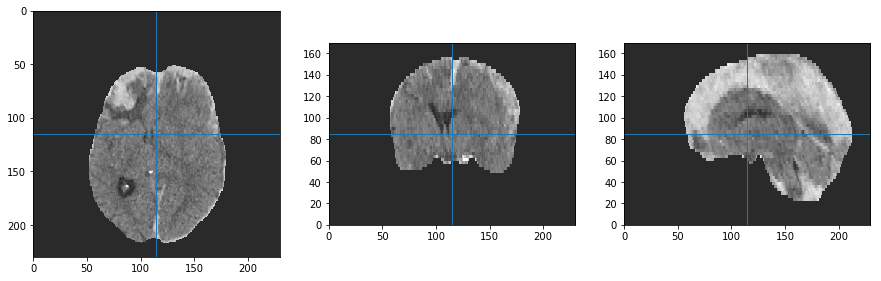

In [233]:
# paths =['/MachineLearning/python tutorials/tutorial3/',
#         '/Volumes/FAIR/Sinead/DC-Project-Images/original/Sample3/',
#         '/Volumes/FAIR/Sinead/DC-Project-Images/original/Sample6/',
#          '/Volumes/FAIR/Sinead/DC-Project-Images/original/Sample4/',
#          '/Volumes/FAIR/Sinead/DC-Project-Images/original/Sample5/S5_Pre_rigid.nrrd',
#          '/Users/fair00542/Desktop/TestImages/ScanB/ScanB',
#          '/Users/fair00542/Desktop/TestImages/ScanF/ScanF']

# paths =[
#        '/Volumes/FAIR/Sinead/DC-Project-Images/ScanFiles_Dicom/ScanB/ScanB_HeadC_SpineTraumaSeq_20141102100723_7_Tilt_Eq_1.nii.gz',
#        '/Volumes/FAIR/Sinead/DC-Project-Images/ScanFiles_Dicom/ScanD/ScanD_HeadC_SpineTrauma_20150402224947_6_Tilt_1.nii.gz',
#        '/Volumes/FAIR/Sinead/DC-Project-Images/ScanFiles_Dicom/ScanE/ScanE_HeadC_SpineTrauma_20150611023452_3.nii.gz',
#        '/Volumes/FAIR/Sinead/DC-Project-Images/ScanFiles_Dicom/ScanF/ScanF_HeadC_SpineTrauma_20150515234756_6.nii.gz',
#        '/Volumes/FAIR/Sinead/DC-Project-Images/ScanFiles_Dicom/ScanG/ScanG_HeadC_SpineTrauma_20150727175302_3.nii.gz',
#        '/Volumes/FAIR/Sinead/DC-Project-Images/ScanFiles_Dicom/ScanH/ScanH_1.25MM_RECONS_20150724224900_4_Tilt_Eq_1.nii.gz',
#        '/Volumes/FAIR/Sinead/DC-Project-Images/ScanFiles_Dicom/ScanI/ScanI_HeadC_SpineTrauma_20150712185123_3_Tilt_1.nii.gz']

paths = ['/Volumes/FAIR/Registered_MPS3/MPS1/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/MPS2/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/MPS3/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/MPS4/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/MPS5/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/MPS6/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/MPS7/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/MPS8/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/MPS9/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/MPS10/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/MPS11/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/MPS12/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/MPS13/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/MPS14/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH4/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH7/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH8/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH11/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH12/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH14/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH16-2/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH24/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/CONT5/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/CONT7/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/EDH7/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/Sample3_Pre/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/Sample3_Post/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/Sample4_Pre/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/tutorial3/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/ScanD/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/ScanE/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/ScanF/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/ScanH/CT.nii.gz',
        ]

# paths = ['/Volumes/FAIR/Eric_Midlinedeliniation/MPS12',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS13',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS14']

path = paths[31]
# do 8, 12 ,25, 30, 31

# mls_path      = path + '/mls.nii.gz'
# midplane_path = path + '/midplane.nii.gz'
print( "Reading Dicom directory:", path)


# reading dicom images
# reader = sitk.ImageSeriesReader()
# dicom_names = reader.GetGDCMSeriesFileNames(path)
# reader.SetFileNames(dicom_names)
# img = reader.Execute()
# img = sitk.ReadImage(dicom_names)
# msk = sitk.ReadImage(path + '/opt_foramen_cut.nii.gz')

# reading nii images
img = sitk.ReadImage(path)
img_array = sitk.GetArrayFromImage(img)
# img_array = np.swapaxes(img_array,0,2)
ConstPixelSpacing = img.GetSpacing()

mask = sitk.ReadImage(os.path.split(path)[0] + '/Brain.nii.gz')
Mask_array = sitk.GetArrayFromImage(mask)
# Mask_array = np.swapaxes(Mask_array,0,2)

# print('CT image')
# display_image(img, window=120, level=40)

# print('Brain mask')
# display_image(mask)

masked_array = img_array
masked_array[Mask_array == 0] = 0

img_masked = sitk.GetImageFromArray(masked_array)
img_masked.CopyInformation(img)

print('Masked image')
display_image(img_masked, window = 120, level = 40)

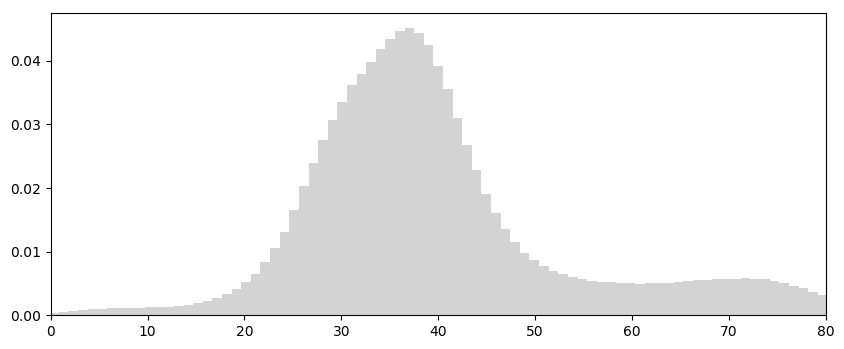

Number of points 1474685


In [234]:
# Take all non-zero voxels and flatten the data into a 1D numpy array
X = img_array[masked_array > 0].flatten().reshape(-1, 1)

# Get the number of points
num_pts = len(X.flatten())

# Extract the minimum and maximum intensity values and calculate the number 
# of bins for the histogram
lim_low = -20 # manually set intensity range of interest
lim_high = 100 # manually set intensity range of interest
num_bins = (lim_high - lim_low + 1)

plt.figure(figsize=(10, 4), dpi=100)
plt.hist(X, bins=num_bins, normed=True, range=(lim_low,lim_high), color='lightgray');
plt.xlim([0,80]) # we limit the x-axis to the range of interest
plt.show()

print('Number of points ' + str(num_pts))

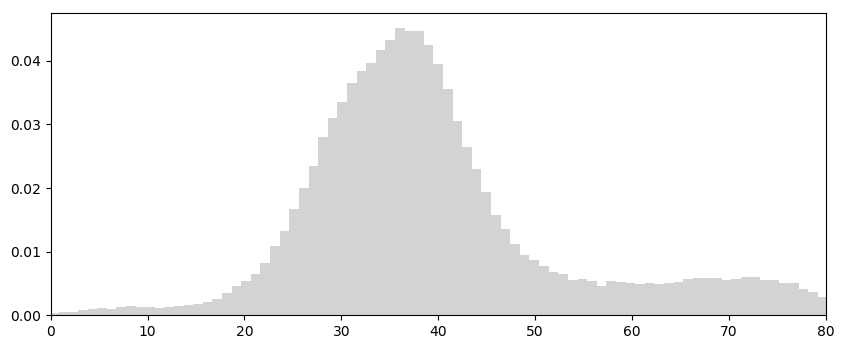

Number of points 117974


In [235]:
sampling = 0.08
X_subset = np.random.choice(X.flatten(),int(num_pts*sampling)).reshape(-1, 1)

plt.figure(figsize=(10, 4), dpi=100)
plt.hist(X_subset, bins=num_bins, normed=True, range=(lim_low, lim_high), color='lightgray');
plt.xlim([0,80]);
plt.show()

print('Number of points ' + str(len(X_subset)))

In [236]:
num_clusters = 5

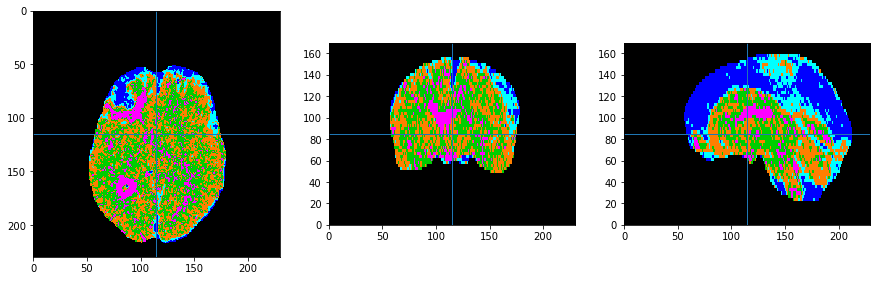

In [237]:
import sklearn.cluster as cluster

# Create a k-means instance
kmeans = cluster.KMeans(n_clusters=num_clusters)

# Running k-means via the fit function
kmeans.fit(X_subset)

# Produce the clustering result for all image points
y = kmeans.predict(img_array.flatten().reshape(-1, 1))

# K-means will produce labels between 0 and (k-1), we want 0 to be background, so we shift the labels by one
y = y + 1 # shift labels
y[(Mask_array == 0).flatten()] = 0 # zero background

# Construct a 3D label map
lab_array = y.reshape(img_array.shape).astype('uint8')
seg_kmeans = sitk.GetImageFromArray(lab_array)
seg_kmeans.CopyInformation(img)

# Display the results using SimpleITK mapping of label maps to colours
# display_image(sitk.LabelToRGB(seg_kmeans),x = 182, y = 136, z = 52)
display_image(sitk.LabelToRGB(seg_kmeans))

In [238]:
label1 = np.multiply(img_array,lab_array==1)
label2 = np.multiply(img_array,lab_array==2)
label3 = np.multiply(img_array,lab_array==3)
label4 = np.multiply(img_array,lab_array==4)
label5 = np.multiply(img_array,lab_array==5)



lesion_label = np.argsort([np.mean(label1[label1>0]),np.mean(label2[label2>0]),
                          np.mean(label3[label3>0]),np.mean(label4[label4>0]),
                          np.mean(label5[label5>0])])[-2] + 1

# highest intensity might be the calcification as well
lesion_label

3

In [239]:
np.argsort([np.mean(label1[label1>0]),np.mean(label2[label2>0]),
                          np.mean(label3[label3>0]),np.mean(label4[label4>0]),
                          np.mean(label5[label5>0])])

array([3, 0, 4, 2, 1])

lesion label : 3


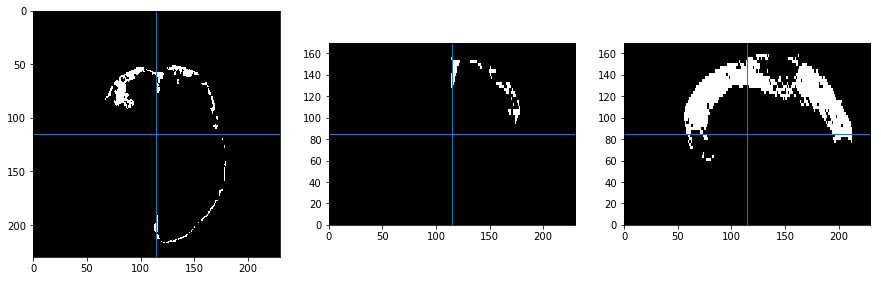

In [240]:
print('lesion label :',lesion_label)
ROI_array = np.zeros(lab_array.shape)
ROI_array[lab_array == 2] = 1
V = BiggestRegion(ROI_array)
ROI = sitk.GetImageFromArray(V)
ROI.CopyInformation(img)


display_image(ROI)

In [241]:
#  Adjust the path number!!!!


sitk.WriteImage(seg_kmeans, os.path.split(path)[0] + '/Seg5.nii.gz')
sitk.WriteImage(ROI, os.path.split(path)[0] + '/Lesion.nii.gz')
# os.chdir(path)
# sitk.WriteImage(ROI_mask,'V_mask.nii.gz')



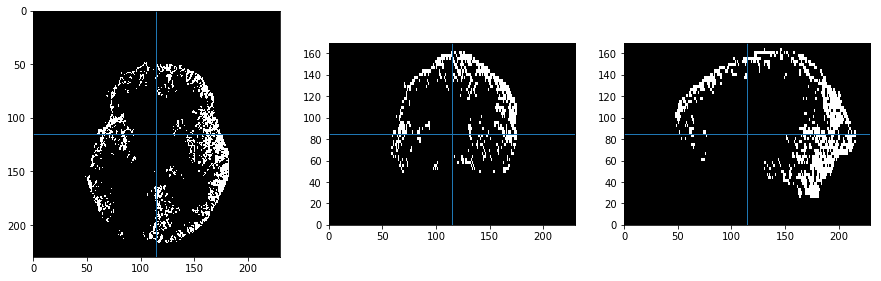

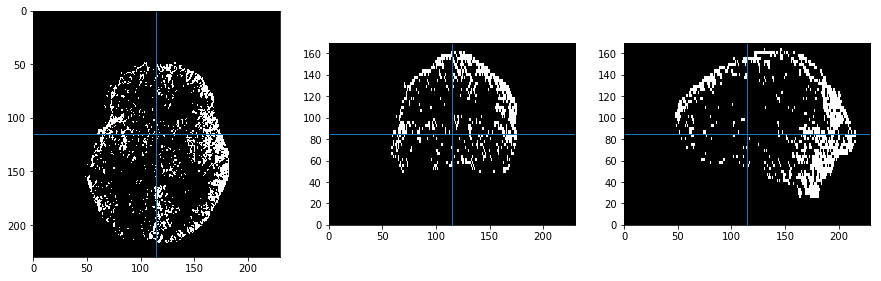

In [231]:
ROI_array = np.zeros(lab_array.shape)
ROI_array[lab_array == 4] = 1
# ROI_array[lab_array == 2] = 1
# seems both label 2 and label 4 are haematoma

V = BiggestRegion(ROI_array)
# ROI_array = V
# ROI_array = be(V)

ROI_mask = sitk.GetImageFromArray(ROI_array)
ROI = sitk.GetImageFromArray(V)
ROI_mask.CopyInformation(img)
ROI.CopyInformation(img)


display_image(ROI)
display_image(ROI_mask)


In [30]:
paths[0]

'/Volumes/FAIR/Sinead/DC-Project-Images/ScanFiles_Dicom/ScanB/ScanB_HeadC_SpineTraumaSeq_20141102100723_7_Tilt_Eq_1.nii.gz'

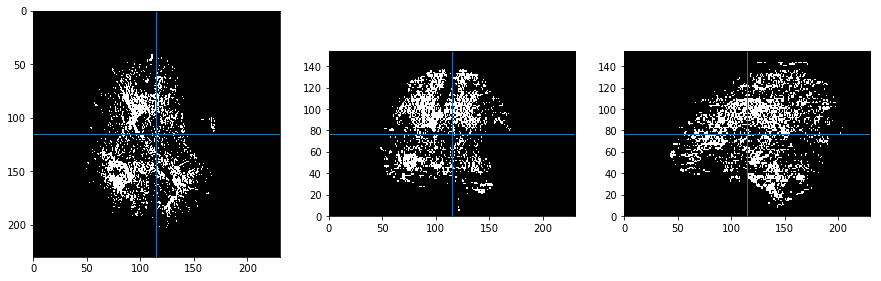

In [27]:
ROI_array = np.zeros(lab_array.shape)
ROI_array[lab_array == 1] = 1
# ROI_array[lab_array == 4] = 1
# seems both label 2 and label 4 are haematoma


ROI_mask = sitk.GetImageFromArray(ROI_array)
ROI_mask.CopyInformation(img)
display_image(ROI_mask)


In [112]:
# Volume of subdural haematoma
np.sum(ROI_array)*img.GetSpacing()[0]*img.GetSpacing()[1]*img.GetSpacing()[2]

62480.0

In [97]:
img.GetSpacing(),np.sum(ROI_array)

((0.4296875, 0.4296875, 0.70001220703125), 1396308.0)

In [86]:
sitk.WriteImage(ROI_mask, paths[1] + 'Pre/Haematoma.nii.gz')

# Ventricles

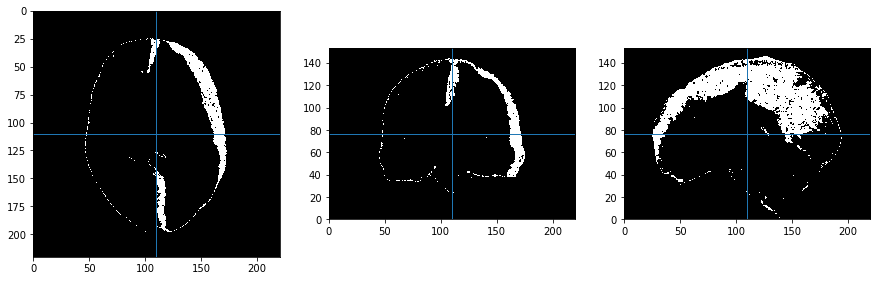

In [23]:
v_array = np.zeros(lab_array.shape)
v_array[lab_array == 3] = 1
v_mask = sitk.GetImageFromArray(v_array)
v_mask.CopyInformation(img)
display_image(v_mask)

In [44]:
# paths =['/MachineLearning/python tutorials/tutorial3/',
#         '/Volumes/FAIR/Sinead/DC-Project-Images/original/Sample3/',
#         '/Volumes/FAIR/Sinead/DC-Project-Images/original/Sample6/',
#          '/Volumes/FAIR/Sinead/DC-Project-Images/original/Sample4/',
#          '/Volumes/FAIR/Sinead/DC-Project-Images/original/Sample5/S5_Pre_rigid.nrrd',
#          '/Users/fair00542/Desktop/TestImages/ScanA/1.3.12.2.1107.5.1.4.54053.30000014091206552395300024468.dcm',
#          '/Users/fair00542/Desktop/TestImages/ScanB/1.3.12.2.1107.5.1.4.51967.30000014110308064564000003663.dcm',
#          '/Users/fair00542/Desktop/TestImages/ScanC/1.3.12.2.1107.5.1.4.95198.30000014121008232151100020392.dcm',
#          '/Users/fair00542/Desktop/TestImages/ScanD/1.3.12.2.1107.5.1.4.95198.30000015040208110913600035430.dcm',
#          '/Users/fair00542/Desktop/TestImages/ScanE/1.3.12.2.1107.5.1.4.95198.30000015061008243097400047439.dcm',
#          '/Users/fair00542/Desktop/TestImages/ScanF/',
#          '/Users/fair00542/Desktop/TestImages/ScanG/1.3.12.2.1107.5.1.4.95198.30000015072708211605400036464.dcm',
#          '/Users/fair00542/Desktop/TestImages/ScanH/1.2.840.113619.2.55.3.2634693835.766.1437720278.192.2.dcm',
#          '/Users/fair00542/Desktop/TestImages/ScanI/1.3.12.2.1107.5.1.4.95198.30000015071109310409300075668.dcm',
#          '/Users/fair00542/Desktop/TestImages/ScanJ/1.2.392.200036.9116.2.6.1.48.1221600807.1432222275.897467.dcm']
# img = sitk.ReadImage(paths[1] + 'Pre/S3_Pre-op.nrrd')
# msk = sitk.ReadImage(paths[1] + 'Pre/opt_foramen_cut.nii.gz')
# # img = sitk.ReadImage(paths[0] + 'ct-brain.nii.gz')
# # msk = sitk.ReadImage(paths[0] + 'ct-brain-mask.nii.gz')

# print('CT image')
# display_image(img, x=70, y=100, z=90, window=120, level=40)

# print('Brain mask')
# display_image(msk, x=70, y=100, z=90)

# # print('CT slice')
# # display_image(img, x = 215, y = 100, z = 100, window = 120, level = 40)
# # print('Brain mask')
# # display_image(msk, x = 215, y = 100, z = 60)

In [195]:
# Binary erosion, structure specified the limit of regions to be removed
v_array1 = be(v_array,structure = np.ones((2,2,1))).astype(v_array.dtype)
v_array2 = bc(v_array1).astype(v_array.dtype)

v_array_b = BiggestRegion(v_array2)
# v_array_b1 = bc(v_array_b).astype(v_array_b.dtype)
# v_array_b2 = bfh(v_array_b1).astype(v_array_b.dtype)

In [129]:
v_mask = sitk.GetImageFromArray(v_array_b2)
v_mask.CopyInformation(img)
sitk.WriteImage(v_mask, paths[0] + 'Pre/ventricles.nii.gz')

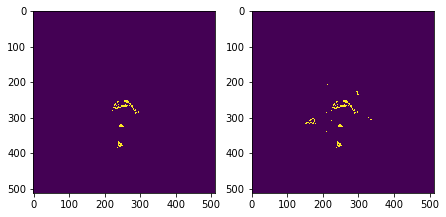

In [140]:
plt.figure(figsize = (15,5))
plt.subplot(141)
plt.imshow(v_array_b[42,:,:])
plt.subplot(142)
plt.imshow(v_array2[42,:,:])
plt.show()

# Septum Pellucidum

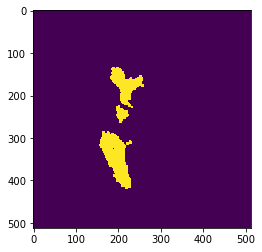

In [196]:
from scipy.ndimage.morphology import binary_dilation as bd
from scipy import ndimage
# specify dilation structure
ROI_v = bd(v_array_b,structure = np.ones((3,3,3)),iterations = 2).astype(v_array_b.dtype)
plt.imshow(ROI_v[96,:,:])

814536

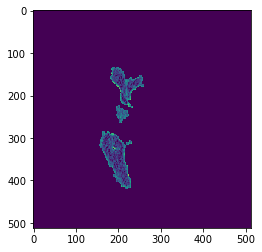

In [198]:
# Isolate the region of interest form the image
Copy_array = img_array
Copy_array[ROI_v == 0] = 0
plt.imshow(img_array[96,:,:])

# Take all non-zero voxels and flatten the data into a 1D numpy array
V = img_array[ROI_v>0].flatten().reshape(-1, 1)

# Get the number of points
num_pts = len(V.flatten())
num_pts

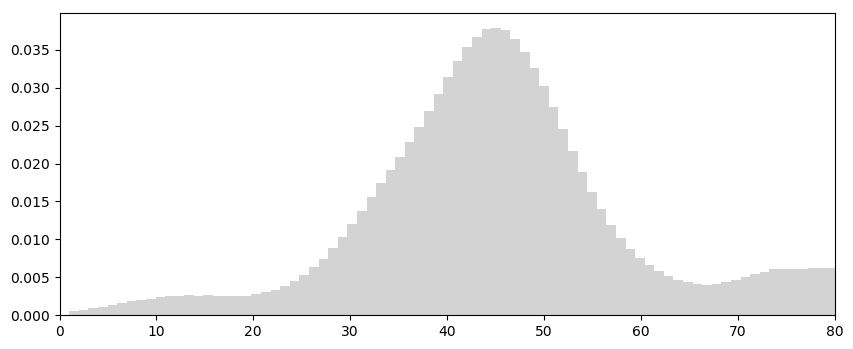

Number of points 814536


In [199]:
# Extract the minimum and maximum intensity values and calculate the number 
# of bins for the histogram
# lim_low = -20 # manually set intensity range of interest
lim_low = V.min()
# lim_high = 100 # manually set intensity range of interest
lim_high = V.max()
num_bins = (lim_high - lim_low + 1)

plt.figure(figsize=(10, 4), dpi=100)
plt.hist(X, bins=num_bins, normed=True, range=(lim_low,lim_high), color='lightgray');
plt.xlim([0,80]) # we limit the x-axis to the range of interest
plt.show()

print('Number of points ' + str(num_pts))

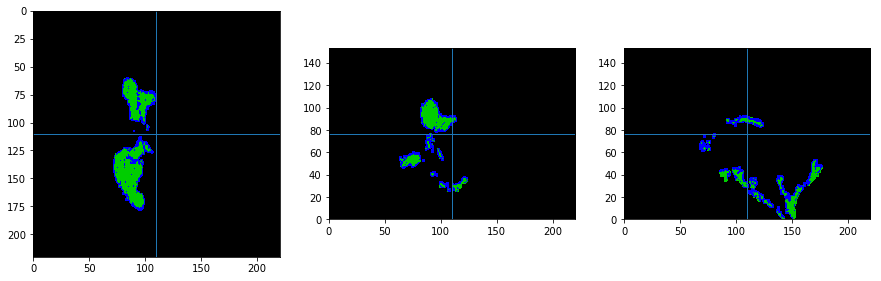

In [352]:
num_clusters = 2
# Create a k-means instance
kmeans = cluster.KMeans(n_clusters=num_clusters)

# Running k-means via the fit function
kmeans.fit(V)

# Produce the clustering result for all image points
y = kmeans.predict(Copy_array.flatten().reshape(-1, 1))

# K-means will produce labels between 0 and (k-1), we want 0 to be background, so we shift the labels by one
y = y + 1 # shift labels
y[(ROI_v == 0).flatten()] = 0 # zero background

# Construct a 3D label map
lab_array = y.reshape(Copy_array.shape).astype('uint8')
seg_kmeans = sitk.GetImageFromArray(lab_array)
seg_kmeans.CopyInformation(img)

# Display the results using SimpleITK mapping of label maps to colours
display_image(sitk.LabelToRGB(seg_kmeans))

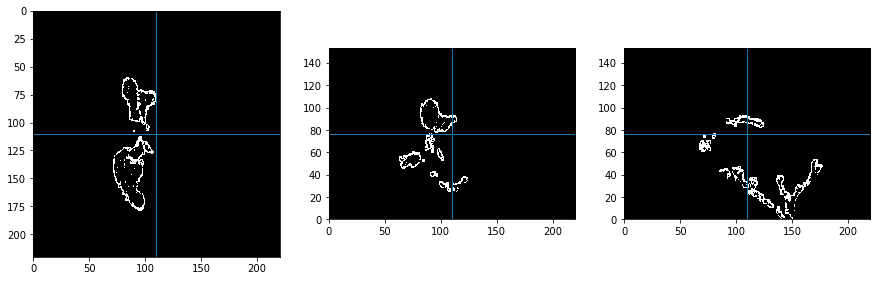

In [354]:
s_array = np.zeros(lab_array.shape)
s_array[lab_array == 2] = 1
s_mask = sitk.GetImageFromArray(s_array)
s_mask.CopyInformation(img)
display_image(s_mask)

In [355]:
# Try looking for the edge map
# sobel derivative filters

sx = ndimage.sobel(ROI_v, axis=0, mode='constant')
sy = ndimage.sobel(ROI_v, axis=1, mode='constant')
sz = ndimage.sobel(ROI_v, axis=2, mode='constant')

# np.hypot Given the “legs” of a right triangle, return its hypotenuse (斜边）
# Equivalent to sqrt(x1**2 + x2**2), element-wise.

# Need to specify dtype to avoid Overflow when doing the square multiplication
# In this case, binary image, so only no need to specify dtype
# Binary image makes better distinction between edge and non-edge structures
sx2,sy2,sz2 = np.square(sx),np.square(sy),np.square(sz)
sob = np.sqrt(sx2+sy2+sz2)

In [362]:
# dilate the edge map to have a thicker edge
sob1 = bd(sob,iterations = 1)
# define the edge pixels as zero, non edge pixels as one
edge = np.ones(sob.shape)
edge[sob1>0] = 0
# Multiply the edge matrix with the SP segmentation results
SP1 = np.multiply(edge,s_array)

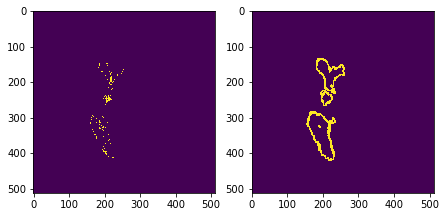

In [363]:
plt.figure(figsize = (15,5))
plt.subplot(141)
plt.imshow(SP1[96,:,:])
plt.subplot(142)
plt.imshow(sob1[96,:,:])
plt.show()

In [339]:
SP_mask = sitk.GetImageFromArray(SP1)
SP_mask.CopyInformation(img)
sitk.WriteImage(SP_mask, paths[0] + 'Pre/SP2.nii.gz')

# Brain Parenchyma

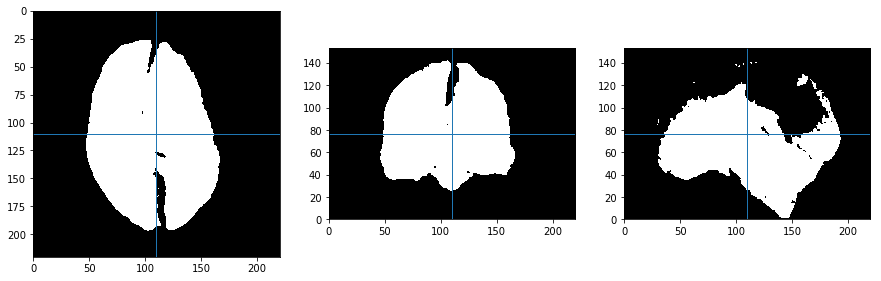

In [17]:
# The brain parenchyma combines the gray and white matter, the edge of the brain where it overlays
# with the bone and the ventricles are included as well to make the brain mask more compact

p_array = np.zeros(lab_array.shape)
p_array[lab_array == 1] = 1
p_array[lab_array == 4] = 1
p_array[lab_array == 3] = 1
p_array[lab_array == 5] = 1

p_mask = sitk.GetImageFromArray(p_array)
p_mask.CopyInformation(img)
display_image(p_mask)

In [ ]:
p_array1 = bfh(p_array).astype(p_array.dtype)

#find largest connected region
import skimage
from skimage import filters
labels,num = skimage.measure.label(p_array1, connectivity=3,return_num='Ture')
if num>1:
    props = skimage.measure.regionprops(labels)
    b = [p.area for p in props]
    ind = b.index(max(b))
    bcoords = props[ind].coords
    b_loop = np.zeros((p_array.shape))
    for i in range(len(bcoords)):
            a,b,c = bcoords[i]
            b_loop[a,b,c]=1
else:
    b_loop = p_array1

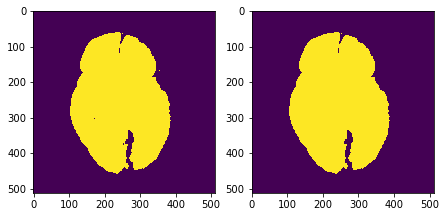

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(141)
plt.imshow(p_array[86,:,:])
plt.subplot(142)
plt.imshow(b_loop[86,:,:])
plt.show()

In [21]:
b_mask = sitk.GetImageFromArray(b_loop)
b_mask.CopyInformation(img)
sitk.WriteImage(b_mask, paths[0] + 'Pre/brainparenchyma.nii.gz')

# Skull

In [80]:
array = sitk.GetArrayFromImage(img)
skull_mask = np.zeros(array.shape)
skull_mask[array > 500] = 1

# again, pick the largest connected
labels,num = skimage.measure.label(skull_mask, connectivity=3,return_num='Ture')
if num>1:
    props = skimage.measure.regionprops(labels)
    b = [p.area for p in props]
    ind = b.index(max(b))
    bcoords = props[ind].coords
    b_loop = np.zeros((p_array.shape))
    for i in range(len(bcoords)):
            a,b,c = bcoords[i]
            b_loop[a,b,c]=1
else:
    b_loop = skull_mask

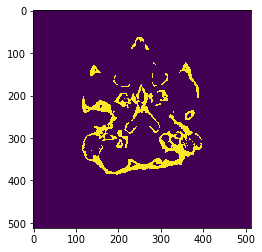

In [82]:
plt.imshow(b_loop[25,:,:])
s_mask = sitk.GetImageFromArray(b_loop)
s_mask.CopyInformation(img)
sitk.WriteImage(s_mask, paths[0] + 'Pre/skull_whole.nii.gz')

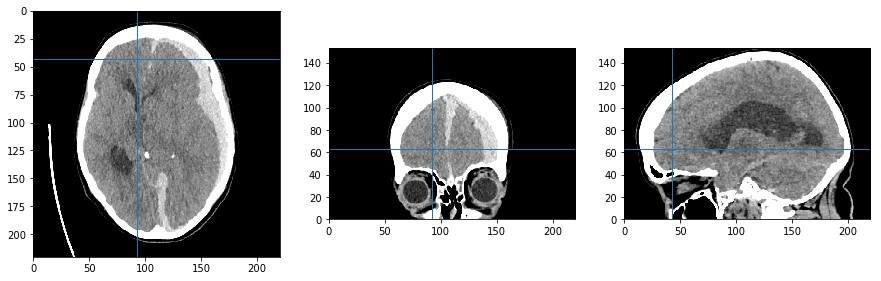